In [57]:
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv

In [179]:
mouse_csv = os.path.join('..', 'matplotlib-challenge', 'Mouse.csv')
results_csv = os.path.join('..', 'matplotlib-challenge', 'results.csv')
mouse_df = pd.read_csv(mouse_csv)
results_df = pd.read_csv(results_csv)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [59]:
#finding any duplicate value in the results file and deleting those duplicates
results_df.sort_values("Mouse ID", inplace = True)
results_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False, inplace = True)


In [74]:
merged_mouse_df = pd.merge(results_df, mouse_df, on='Mouse ID')
merged_mouse_df.sort_values("Drug Regimen")
merged_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,25,56.793208,1,Infubinol,Female,20,23
3,a203,40,63.593490,2,Infubinol,Female,20,23
4,a203,35,61.931650,2,Infubinol,Female,20,23


In [61]:
#merged_mouse_df.to_csv("clean.csv", index=False)


In [62]:
# tumor volumne Standard deviation
merged_mouse_df = merged_mouse_df.groupby('Drug Regimen')
mousestd = merged_mouse_df.std()
mousestd = mousestd.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Standard Deviation"})
mousestd = mousestd.drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)


In [63]:
#Tumor volumne mean
mousemean = merged_mouse_df.mean()
mousemean = mousemean.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Average"})
mousemean = mousemean.drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)


In [64]:
#Tumor volumne mean
mousemed = merged_mouse_df.median()
mousemed = mousemed.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Median"})
mousemed = mousemed.drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)


In [65]:
#Tumor volumne variance
mousevar = merged_mouse_df.var()
mousevar = mousevar.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"})
mousevar = mousevar.drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)


In [66]:
#Tumor volumne variance
mousesem = merged_mouse_df.sem()
mousesem = mousesem.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume SEM"})
mousesem = mousesem.drop(['Mouse ID', 'Metastatic Sites', 'Age_months', 'Weight (g)', 'Sex', 'Timepoint'], axis=1)


In [67]:
#combining the dataframes showing stats table for the tumor growth vs Drugs
temp1 = pd.merge(mousesem, mousevar, on='Drug Regimen')
temp2 = pd.merge(temp1, mousemed, on = 'Drug Regimen')
temp3 = pd.merge(temp2, mousemean, on = 'Drug Regimen')
tumor_df = pd.merge(temp3, mousestd, on = 'Drug Regimen')
tumor_df

,Tumor Volume SEM,Tumor Volume Variance,Tumor Volume Median,Tumor Volume Average,Tumor Volume Standard Deviation
Drug Regimen,,,,,
Capomulin,0.329346,24.947764,41.557809,40.675741,4.994774
Ceftamin,0.469821,39.290177,51.776157,52.591172,6.268188
Infubinol,0.492236,43.128684,51.820584,52.884795,6.567243
Ketapril,0.603860,68.553577,53.698743,55.235638,8.279709
Naftisol,0.596466,66.173479,52.509285,54.331565,8.134708
Placebo,0.581331,61.168083,52.288934,54.033581,7.821003
Propriva,0.540135,44.053659,50.854632,52.458254,6.637293
Ramicane,0.320955,23.486704,40.673236,40.216745,4.846308
Stelasyn,0.573111,59.450562,52.431737,54.233149,7.710419


In [68]:
# Split up our data into groups based upon 'Drug Regimen'
#drug_groups = merged_mouse_df.groupby('Drug Regimen')
# Find out how many mice took each drup 
mouse_meds = merged_mouse_df['Mouse ID'].count()
mouse_meds

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     151
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

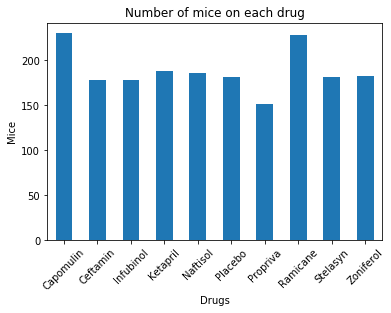

In [69]:
# chart data and give it a title, and label for each axis
meds_chart = mouse_meds.plot(kind="bar", title="Number of mice on each drug", rot=45)
meds_chart.set_xlabel("Drugs")
meds_chart.set_ylabel("Mice")

plt.show()


In [70]:
mouse_sex = mouse_df.groupby('Sex')

count_sex = mouse_sex['Drug Regimen'].count()
count_sex

Sex
Female    124
Male      125
Name: Drug Regimen, dtype: int64

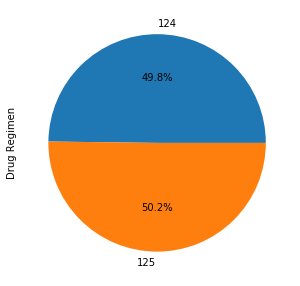

In [71]:
plot = count_sex.plot.pie(y=count_sex,labels=count_sex, autopct="%1.1f%%", figsize=(5,5))
plt.show()

In [180]:
merged_mouse_df.head()
capomulin = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == 'Capomulin', ["Mouse ID", "Tumor Volume (mm3)"]] 
capomulin

,Mouse ID,Tumor Volume (mm3)
174,b128,43.270852
175,b128,45.651331
176,b128,45.000000
177,b128,40.605335
178,b128,43.784893
...,...,...
1821,y793,45.000000
1822,y793,35.726023
1823,y793,38.992734
1824,y793,40.716428


In [160]:
id_capomulin = capomulin.groupby(['Mouse ID'])
pointmax = id_capomulin.min()
pointmax = pointmax.rename(columns={'Tumor Volume (mm3)': 'Capomulin_tumorV'})

# This will provide a subset of the df IQR
def subset_by_iqr(pointmax, Capomulin_tumorV, whisker_width=1.5):
    q1 = pointmax[Capomulin_tumorV].quantile(0.25)
    q3 = pointmax[Capomulin_tumorV].quantile(0.75)
    iqr = q3 - q1
    filter = (pointmax[Capomulin_tumorV] >= q1 - whisker_width*iqr) & (pointmax[Capomulin_tumorV] <= q3 + whisker_width*iqr)
    return pointmax.loc[filter]
df_filtered = subset_by_iqr(pointmax, 'Capomulin_tumorV', whisker_width=1.5)

df_filtered
#pointmax.Capomulin_tumorV.quantile([0.25,0.50,0.75,1])

,Capomulin_tumorV
Mouse ID,
b128,37.967644
b742,37.950355
f966,30.485985
g288,36.356851
g316,40.159220
i557,42.261665
i738,34.973438
j119,38.125164
j246,38.044082


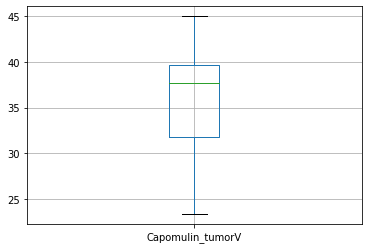

In [167]:
boxplot = df_filtered.boxplot(column=['Capomulin_tumorV'])

In [162]:
ramicane = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == 'Ramicane', ["Mouse ID", "Tumor Volume (mm3)"]] 

id_ramicane = ramicane.groupby(['Mouse ID'])
Rpointmax = id_ramicane.min()
Rpointmax = Rpointmax.rename(columns={'Tumor Volume (mm3)': 'Ramicane_tumorV'})
# This will provide a subset of the df IQR
def subset_by_iqr(Rpointmax, Ramicane_tumorV, whisker_width=1.5):
    q1 = Rpointmax[Ramicane_tumorV].quantile(0.25)
    q3 = Rpointmax[Ramicane_tumorV].quantile(0.75)
    iqr = q3 - q1
    filter = (Rpointmax[Ramicane_tumorV] >= q1 - whisker_width*iqr) & (Rpointmax[Ramicane_tumorV] <= q3 + whisker_width*iqr)
    return Rpointmax.loc[filter]
Rdf_filtered = subset_by_iqr(Rpointmax, 'Ramicane_tumorV', whisker_width=1.5)
Rdf_filtered

,Ramicane_tumorV
Mouse ID,
a411,38.087373
a444,41.714619
a520,35.590254
a644,32.978522
c458,37.753150
c758,32.833189
d251,37.311236
e662,40.659006
g791,29.128472


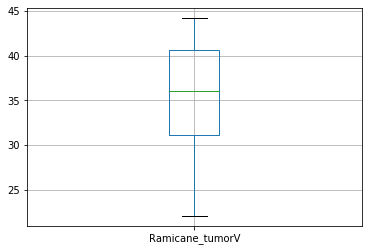

In [168]:
boxplot = Rdf_filtered.boxplot(column=['Ramicane_tumorV'])

In [190]:
infubinol = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == 'Infubinol', ["Mouse ID", "Tumor Volume (mm3)"]] 

id_infubinol = infubinol.groupby(['Mouse ID'])
Ipointmax = id_infubinol.min()
Ipointmax = Ipointmax.rename(columns={'Tumor Volume (mm3)': 'Infubinol_tumorV'})



In [189]:
ceftamin = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == 'Ceftamin', ["Mouse ID", "Tumor Volume (mm3)"]] 

id_ceftamin = ceftamin.groupby(['Mouse ID'])
Cpointmax = id_ceftamin.min()
Cpointmax = Cpointmax.rename(columns={'Tumor Volume (mm3)': 'Ceftamin Tumor Volume'})


In [185]:
#selecting mouse id b128 and doing a scatter plot of the tumor growth

mouseb128 = merged_mouse_df.loc[merged_mouse_df["Mouse ID"] == 'b128', ["Mouse ID","Timepoint", "Tumor Volume (mm3)"]] 
mouseb128


,Mouse ID,Timepoint,Tumor Volume (mm3)
174,b128,10,43.270852
175,b128,5,45.651331
176,b128,0,45.000000
177,b128,30,40.605335
178,b128,15,43.784893
179,b128,35,37.967644
180,b128,40,38.379726
181,b128,20,42.731552
182,b128,45,38.982878
183,b128,25,43.262145


Text(0, 0.5, 'Tumor Volume')

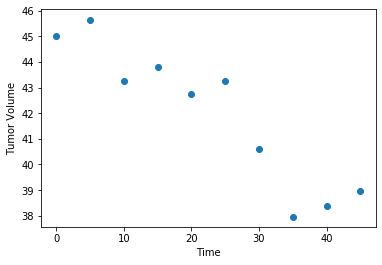

In [186]:
mouse = mouseb128.Timepoint
Tumor_volume = mouseb128.iloc[:,2]
plt.scatter(mouse,Tumor_volume)
#plt.xticks(year, rotation=90)
plt.xlabel('Time')
plt.ylabel('Tumor Volume')

In [187]:
#comparing mouse weight vs tumor size for the drug Capomulin

gvstumor = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == 'Capomulin', ["Weight (g)","Timepoint", "Tumor Volume (mm3)"]] 
gvstumor


,Weight (g),Timepoint,Tumor Volume (mm3)
174,22,10,43.270852
175,22,5,45.651331
176,22,0,45.000000
177,22,30,40.605335
178,22,15,43.784893
...,...,...,...
1821,17,0,45.000000
1822,17,30,35.726023
1823,17,25,38.992734
1824,17,20,40.716428


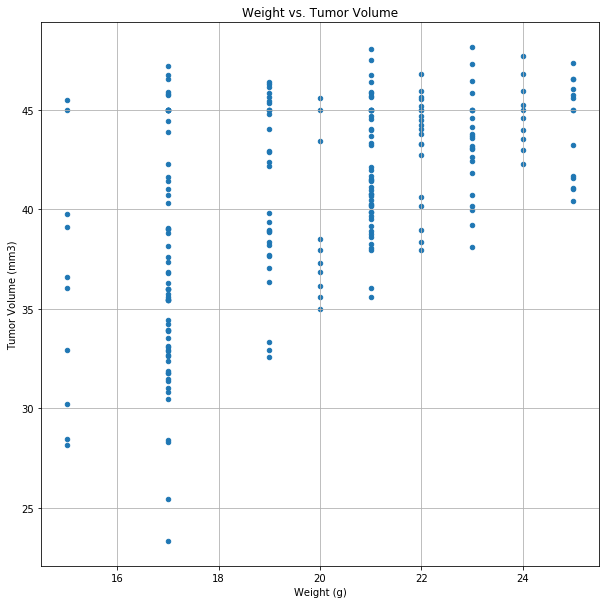

In [191]:
gvstumor['Weight (g)'] = pd.to_numeric(gvstumor['Weight (g)'])

gvstumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(10,10), title="Weight vs. Tumor Volume")
